<a href="https://colab.research.google.com/github/NguyenKiet2k2/AI/blob/main/20146500_10Vietnamese_dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [3]:
%cd /content/drive/MyDrive/VN_dishes/

/content/drive/MyDrive/VN_dishes


In [4]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
# Tạo bộ dữ liệu training set
training_set=train.flow_from_directory('/content/drive/MyDrive/VN_dishes/VN_FOOD', target_size=(120,120), batch_size=32, class_mode='categorical')

Found 140 images belonging to 10 classes.


In [6]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'banhmi': 0,
 'banhxeo': 1,
 'bunbohue': 2,
 'buncha': 3,
 'caolau': 4,
 'comtam': 5,
 'goicuon': 6,
 'hutieu': 7,
 'miquang': 8,
 'pho': 9}

In [9]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same',input_shape=(120,120,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(64,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(256,activation='linear',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(10,activation='softmax'))

# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 120, 120, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 120, 120, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [10]:
his = model.fit_generator( training_set, epochs=70, steps_per_epoch=len(training_set))

<ipython-input-10-3a97a673233b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator( training_set, epochs=70, steps_per_epoch=len(training_set))


Epoch 1/70
5/5 [==============================] - 41s 9s/step - loss: 17.2122 - accuracy: 0.0929
Epoch 2/70
5/5 [==============================] - 7s 1s/step - loss: 3.4821 - accuracy: 0.1857
Epoch 3/70
5/5 [==============================] - 6s 1s/step - loss: 2.5307 - accuracy: 0.2286
Epoch 4/70
5/5 [==============================] - 6s 1s/step - loss: 2.1201 - accuracy: 0.2429
Epoch 5/70
5/5 [==============================] - 6s 1s/step - loss: 1.8971 - accuracy: 0.3714
Epoch 6/70
5/5 [==============================] - 6s 1s/step - loss: 1.6780 - accuracy: 0.5143
Epoch 7/70
5/5 [==============================] - 6s 1s/step - loss: 1.6253 - accuracy: 0.4143
Epoch 8/70
5/5 [==============================] - 6s 1s/step - loss: 1.3137 - accuracy: 0.5500
Epoch 9/70
5/5 [==============================] - 8s 1s/step - loss: 1.2455 - accuracy: 0.5571
Epoch 10/70
5/5 [==============================] - 7s 1s/step - loss: 1.0804 - accuracy: 0.6143
Epoch 11/70
5/5 [==============================

In [11]:
model.save('/content/drive/MyDrive/VN_dishes/VN_FOOD/VN_FOOD.h5')
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.002626341301947832
Train Accuracy 1.0


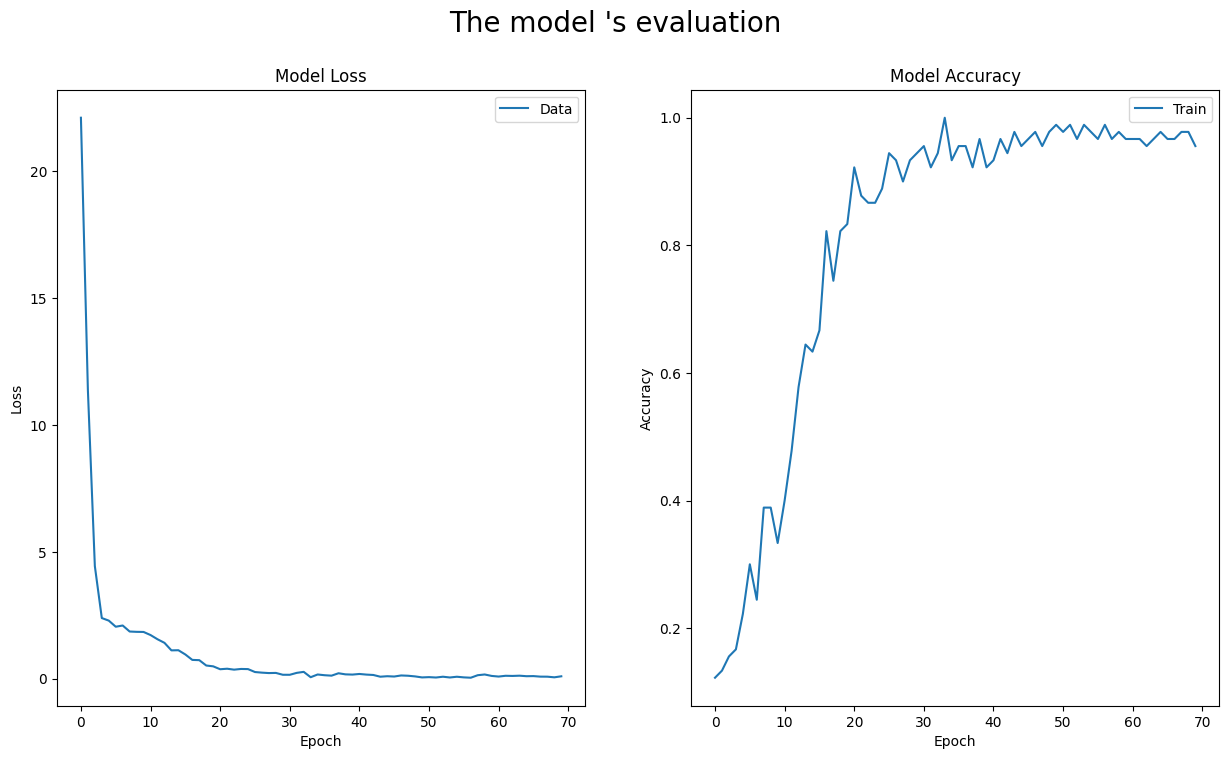

In [13]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(his.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(his.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])
plt.show()

1/1 [==============================] - 0s 111ms/step
Đây là món ăn đặc sản của người Việt : bánh mì


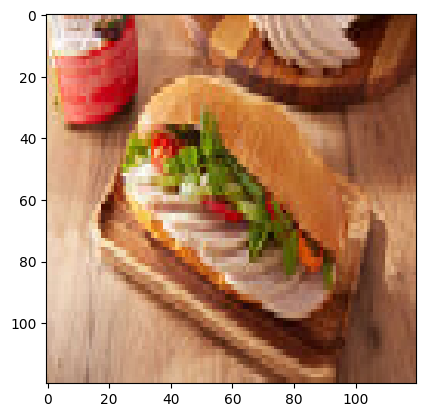

1/1 [==============================] - 0s 48ms/step
Đây là món ăn đặc sản của người Việt : hủ tiếu


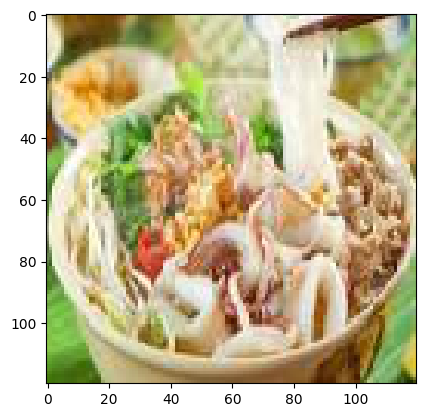

1/1 [==============================] - 0s 43ms/step
Đây là món ăn đặc sản của người Việt : bún chả


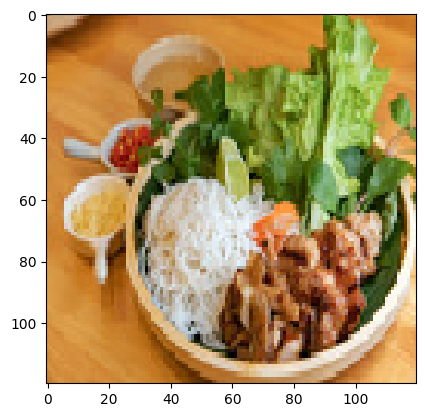

In [15]:
model1= load_model('/content/drive/MyDrive/VN_dishes/VN_FOOD/VN_FOOD.h5')

folder='/content/drive/MyDrive/VN_dishes/VN_FOOD/TEST/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(120,120))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model1.predict(img).argmax())
  class_name=['bánh mì', 'bánh xèo', 'bún bò huế', 'bún chả', 'cao lầu', 'cơm tấm','gỏi cuốn','hủ tiếu', 'mì quảng','phở']
  print('Đây là món ăn đặc sản của người Việt : {}'.format(class_name[result]))
  plt.show()
